In [129]:
import pandas as pd
# Read excel document
excel_data_df = pd.read_excel('Transcription- Audio MDD.xlsx', sheet_name='Sheet1')
# Convert excel to string (define orientation of document in this case from up to down)
thisisjson = excel_data_df.to_json(orient='records')
# Print out the result
print('Excel Sheet to JSON:\n', thisisjson)
# Make the string into a list to be able to input in to a JSON-file
thisisjson_dict = json.loads(thisisjson)
# Define file to write to and 'w' for write option -> json.dump() defining the list to write from and file to write to
with open('data.json', 'w') as json_file:
    json.dump(thisisjson_dict, json_file)

Excel Sheet to JSON:
 [{"ID":"006q1","speech":"Perasaan saya tiga hari ni rasa macam penat rasa lethargic rasa  hopeless helpless rasa macam tak happy lah. Untuk second case saya tak rasa apa-apa I feel nothing entah tak ada rasa apa-apa pun. Stress tak ada stress sangat kot. Cuma depression trigger from my childhoodn lah sebab i'm growing up from problematic family sebab something happen when I was a kid that leads to this feeling lah","is_depressed":1},{"ID":"110q1","speech":"Sejujurnya saya berasa diri saya kosong saya tak ada hala tuju dan saya tak nampak masa depan saya apa yang saya boleh buat seumpama menunggu mati. Saya juga rasa bosan walaupun saya ada family, ada isteri yang baik ada anak-anak yang sangat comel masih kecil. Yang pertama sulung nak masuk 2 tahun insyaAllah dalam bulan ni. Yang kedua baru nak masuk 5 bulan. Saya cuba busy saya cuba sibukkan  kan diri saya dengan pelbagai ikhtiar lah dengan berniaga makanan kecil-kecilan. tapi sejujurnya saya tak nampak hala tuj

In [130]:
import numpy as np
import json

#import csv

In [131]:
with open ("data.json",'r')as f:
    datastore = json.load(f)


In [132]:
datastore

[{'ID': '006q1',
  'speech': "Perasaan saya tiga hari ni rasa macam penat rasa lethargic rasa  hopeless helpless rasa macam tak happy lah. Untuk second case saya tak rasa apa-apa I feel nothing entah tak ada rasa apa-apa pun. Stress tak ada stress sangat kot. Cuma depression trigger from my childhoodn lah sebab i'm growing up from problematic family sebab something happen when I was a kid that leads to this feeling lah",
  'is_depressed': 1},
 {'ID': '110q1',
  'speech': 'Sejujurnya saya berasa diri saya kosong saya tak ada hala tuju dan saya tak nampak masa depan saya apa yang saya boleh buat seumpama menunggu mati. Saya juga rasa bosan walaupun saya ada family, ada isteri yang baik ada anak-anak yang sangat comel masih kecil. Yang pertama sulung nak masuk 2 tahun insyaAllah dalam bulan ni. Yang kedua baru nak masuk 5 bulan. Saya cuba busy saya cuba sibukkan  kan diri saya dengan pelbagai ikhtiar lah dengan berniaga makanan kecil-kecilan. tapi sejujurnya saya tak nampak hala tuju saya

In [133]:
speech =[]
labels = []
ID = []

In [134]:
for item in datastore:
    speech.append(item['speech'])
    labels.append(item['is_depressed'])
    ID.append(item['ID'])

In [135]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', ' ', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [136]:
speech_clean1 = list(map(round1,speech))
speech_clean1

['perasaan saya tiga hari ni rasa macam penat rasa lethargic rasa  hopeless helpless rasa macam tak happy lah  untuk second case saya tak rasa apa apa i feel nothing entah tak ada rasa apa apa pun  stress tak ada stress sangat kot  cuma depression trigger from my childhoodn lah sebab i m growing up from problematic family sebab something happen when i was a kid that leads to this feeling lah',
 'sejujurnya saya berasa diri saya kosong saya tak ada hala tuju dan saya tak nampak masa depan saya apa yang saya boleh buat seumpama menunggu mati  saya juga rasa bosan walaupun saya ada family  ada isteri yang baik ada anak anak yang sangat comel masih kecil  yang pertama sulung nak masuk  tahun insyaallah dalam bulan ni  yang kedua baru nak masuk  bulan  saya cuba busy saya cuba sibukkan  kan diri saya dengan pelbagai ikhtiar lah dengan berniaga makanan kecil kecilan  tapi sejujurnya saya tak nampak hala tuju saya  saya sentiasa sedih saya rasa kosong   kadang kadang tu macam entah rasakan mu

In [137]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [138]:
speech_clean2 = list(map(round2,speech_clean1))
speech_clean2

['perasaan saya tiga hari ni rasa macam penat rasa lethargic rasa  hopeless helpless rasa macam tak happy lah  untuk second case saya tak rasa apa apa i feel nothing entah tak ada rasa apa apa pun  stress tak ada stress sangat kot  cuma depression trigger from my childhoodn lah sebab i m growing up from problematic family sebab something happen when i was a kid that leads to this feeling lah',
 'sejujurnya saya berasa diri saya kosong saya tak ada hala tuju dan saya tak nampak masa depan saya apa yang saya boleh buat seumpama menunggu mati  saya juga rasa bosan walaupun saya ada family  ada isteri yang baik ada anak anak yang sangat comel masih kecil  yang pertama sulung nak masuk  tahun insyaallah dalam bulan ni  yang kedua baru nak masuk  bulan  saya cuba busy saya cuba sibukkan  kan diri saya dengan pelbagai ikhtiar lah dengan berniaga makanan kecil kecilan  tapi sejujurnya saya tak nampak hala tuju saya  saya sentiasa sedih saya rasa kosong   kadang kadang tu macam entah rasakan mu

In [139]:
all_stopwords= ['abdul',
 'abdullah',
 'acara',
 'ada',
 'adalah',
 'ahmad',
 'air',
 'akan',
 'akhbar',
 'akhir',
 'aktiviti',
 'alam',
 'amat',
 'amerika',
 'anak',
 'anggota',
 'antara',
 'antarabangsa',
 'apa',
 'apabila',
 'april',
 'as',
 'asas',
 'asean',
 'asia',
 'asing',
 'atas',
 'atau',
 'australia',
 'awal',
 'awam',
 'bagaimanapun',
 'bagi',
 'bahagian',
 'bahan',
 'baharu',
 'bahawa',
 'bandar',
 'bank',
 'banyak',
 'barangan',
 'baru',
 'baru-baru',
 'bawah',
 'beberapa',
 'bekas',
 'beliau',
 'belum',
 'berada',
 'berakhir',
 'berbanding',
 'berdasarkan',
 'berharap',
 'berikutan',
 'berjaya',
 'berjumlah',
 'berkaitan',
 'berkata',
 'berkenaan',
 'berlaku',
 'bermula',
 'bernama',
 'bernilai',
 'bersama',
 'berubah',
 'besar',
 'bhd',
 'bidang',
 'bilion',
 'bn',
 'bukan',
 'bulan',
 'bursa',
 'cadangan',
 'china',
 'dagangan',
 'dalam',
 'dan',
 'dana',
 'dapat',
 'dari',
 'daripada',
 'dasar',
 'datang',
 'datuk',
 'demikian',
 'dengan',
 'depan',
 'derivatives',
 'dewan',
 'di',
 'diadakan',
 'dibuka',
 'dicatatkan',
 'dijangka',
 'diniagakan',
 'dis',
 'disember',
 'ditutup',
 'dolar',
 'dr',
 'dua',
 'dunia',
 'ekonomi',
 'eksekutif',
 'eksport',
 'empat',
 'enam',
 'faedah',
 'feb',
 'global',
 'hadapan',
 'hanya',
 'harga',
 'hari',
 'hasil',
 'hingga',
 'hubungan',
 'ia',
 'iaitu',
 'ialah',
 'indeks',
 'india',
 'indonesia',
 'industri',
 'ini',
 'islam',
 'isnin',
 'isu',
 'itu',
 'jabatan',
 'jalan',
 'jan',
 'jawatan',
 'jawatankuasa',
 'jepun',
 'jika',
 'jualan',
 'juga',
 'julai',
 'jumaat',
 'jumlah',
 'jun',
 'juta',
 'kadar',
 'kalangan',
 'kali',
 'kami',
 'kata',
 'katanya',
 'kaunter',
 'kawasan',
 'ke',
 'keadaan',
 'kecil',
 'kedua',
 'kedua-dua',
 'kedudukan',
 'kekal',
 'kementerian',
 'kemudahan',
 'kenaikan',
 'kenyataan',
 'kepada',
 'kepentingan',
 'keputusan',
 'kerajaan',
 'kerana',
 'kereta',
 'kerja',
 'kerjasama',
 'kes',
 'keselamatan',
 'keseluruhan',
 'kesihatan',
 'ketika',
 'ketua',
 'keuntungan',
 'kewangan',
 'khamis',
 'kini',
 'kira-kira',
 'kita',
 'klci',
 'klibor',
 'komposit',
 'kontrak',
 'kos',
 'kuala',
 'kuasa',
 'kukuh',
 'kumpulan',
 'lagi',
 'lain',
 'langkah',
 'laporan',
 'lebih',
 'lepas',
 'lima',
 'lot',
 'luar',
 'lumpur',
 'mac',
 'mahkamah',
 'mahu',
 'majlis',
 'makanan',
 'maklumat',
 'malam',
 'malaysia',
 'mana',
 'manakala',
 'masa',
 'masalah',
 'masih',
 'masing-masing',
 'masyarakat',
 'mata',
 'media',
 'mei',
 'melalui',
 'melihat',
 'memandangkan',
 'memastikan',
 'membantu',
 'membawa',
 'memberi',
 'memberikan',
 'membolehkan',
 'membuat',
 'mempunyai',
 'menambah',
 'menarik',
 'menawarkan',
 'mencapai',
 'mencatatkan',
 'mendapat',
 'mendapatkan',
 'menerima',
 'menerusi',
 'mengadakan',
 'mengambil',
 'mengenai',
 'menggalakkan',
 'menggunakan',
 'mengikut',
 'mengumumkan',
 'mengurangkan',
 'meningkat',
 'meningkatkan',
 'menjadi',
 'menjelang',
 'menokok',
 'menteri',
 'menunjukkan',
 'menurut',
 'menyaksikan',
 'menyediakan',
 'mereka',
 'merosot',
 'merupakan',
 'mesyuarat',
 'minat',
 'minggu',
 'minyak',
 'modal',
 'mohd',
 'mudah',
 'mungkin',
 'naik',
 'najib',
 'nasional',
 'negara',
 'negara-negara',
 'negeri',
 'niaga',
 'nilai',
 'nov',
 'ogos',
 'okt',
 'oleh',
 'operasi',
 'orang',
 'pada',
 'pagi',
 'paling',
 'pameran',
 'papan',
 'para',
 'paras',
 'parlimen',
 'parti',
 'pasaran',
 'pasukan',
 'pegawai',
 'pejabat',
 'pekerja',
 'pelabur',
 'pelaburan',
 'pelancongan',
 'pelanggan',
 'pelbagai',
 'peluang',
 'pembangunan',
 'pemberita',
 'pembinaan',
 'pemimpin',
 'pendapatan',
 'pendidikan',
 'penduduk',
 'penerbangan',
 'pengarah',
 'pengeluaran',
 'pengerusi',
 'pengguna',
 'pengurusan',
 'peniaga',
 'peningkatan',
 'penting',
 'peratus',
 'perdagangan',
 'perdana',
 'peringkat',
 'perjanjian',
 'perkara',
 'perkhidmatan',
 'perladangan',
 'permintaan',
 'perniagaan',
 'persekutuan',
 'persidangan',
 'pertama',
 'pertubuhan',
 'pertumbuhan',
 'perusahaan',
 'peserta',
 'petang',
 'pihak',
 'pilihan',
 'pinjaman',
 'polis',
 'politik',
 'presiden',
 'prestasi',
 'produk',
 'program',
 'projek',
 'proses',
 'proton',
 'pukul',
 'pula',
 'pusat',
 'rabu',
 'rakan',
 'rakyat',
 'ramai',
 'rantau',
 'raya',
 'rendah',
 'ringgit',
 'rumah',
 'sabah',
 'sahaja',
 'saham',
 'sama',
 'sarawak',
 'satu',
 'sawit',
 'sdn',
 'sebagai',
 'sebahagian',
 'sebanyak',
 'sebarang',
 'sebelum',
 'sebelumnya',
 'sebuah',
 'secara',
 'sedang',
 'segi',
 'sehingga',
 'sejak',
 'sekarang',
 'sektor',
 'sekuriti',
 'selain',
 'selama',
 'selasa',
 'selatan',
 'selepas',
 'seluruh',
 'semakin',
 'semalam',
 'semasa',
 'sementara',
 'semua',
 'semula',
 'sen',
 'sepanjang',
 'seperti',
 'sept',
 'september',
 'serantau',
 'seri',
 'serta',
 'sesi',
 'setiap',
 'setiausaha',
 'sidang',
 'singapura',
 'sini',
 'sistem',
 'sokongan',
 'sri',
 'sudah',
 'sukan',
 'suku',
 'sumber',
 'supaya',
 'susut',
 'syarikat',
 'syed',
 'tahap',
 'tahun',
 'tan',
 'tanah',
 'tanpa',
 'tawaran',
 'teknologi',
 'telah',
 'tempat',
 'tempatan',
 'tempoh',
 'tenaga',
 'tengah',
 'tentang',
 'terbaik',
 'terbang',
 'terbesar',
 'terbuka',
 'terdapat',
 'terhadap',
 'termasuk',
 'tersebut',
 'terus',
 'tetapi',
 'thailand',
 'tiada',
 'tiga',
 'timbalan',
 'timur',
 'tindakan',
 'tinggi',
 'tun',
 'tunai',
 'turun',
 'turut',
 'umno',
 'unit',
 'untuk',
 'untung',
 'urus',
 'usaha',
 'utama',
 'walaupun',
 'wang',
 'wanita',
 'wilayah',
 'yang']



#"buat","kadang","boleh","dalam","jadi","jangan",'rasa',"akan","dia","then","banyak","apa","okay","di","dah","je",
#"so","haa","dengan","tak","pun","nak","lah","kan","and","kat","lah","to","ada","ya","saya","hmm","ah","tu","macam","dan",
#"kami","kalau","dari","lagi","kerana","itu","ini","ke","snagat","sangat","pasal","tetapi","apabila","ni","itu","seperti",
#"erm","bagi","contoh","if","ermm","tapi","ha","sebab","bila","that","rasa", "my", "of", "i","from","ahh", "agak","the",
#"benda","memang","still","for","assalamualaikum","insyaAllah","insyaallah","nama"]

#elimination of original stopwords: saya, tidak, perlu, boleh untuk tak boleh, sendiri, seorang, baik untuk "better"

all_stopwords


['abdul',
 'abdullah',
 'acara',
 'ada',
 'adalah',
 'ahmad',
 'air',
 'akan',
 'akhbar',
 'akhir',
 'aktiviti',
 'alam',
 'amat',
 'amerika',
 'anak',
 'anggota',
 'antara',
 'antarabangsa',
 'apa',
 'apabila',
 'april',
 'as',
 'asas',
 'asean',
 'asia',
 'asing',
 'atas',
 'atau',
 'australia',
 'awal',
 'awam',
 'bagaimanapun',
 'bagi',
 'bahagian',
 'bahan',
 'baharu',
 'bahawa',
 'bandar',
 'bank',
 'banyak',
 'barangan',
 'baru',
 'baru-baru',
 'bawah',
 'beberapa',
 'bekas',
 'beliau',
 'belum',
 'berada',
 'berakhir',
 'berbanding',
 'berdasarkan',
 'berharap',
 'berikutan',
 'berjaya',
 'berjumlah',
 'berkaitan',
 'berkata',
 'berkenaan',
 'berlaku',
 'bermula',
 'bernama',
 'bernilai',
 'bersama',
 'berubah',
 'besar',
 'bhd',
 'bidang',
 'bilion',
 'bn',
 'bukan',
 'bulan',
 'bursa',
 'cadangan',
 'china',
 'dagangan',
 'dalam',
 'dan',
 'dana',
 'dapat',
 'dari',
 'daripada',
 'dasar',
 'datang',
 'datuk',
 'demikian',
 'dengan',
 'depan',
 'derivatives',
 'dewan',
 'di',


In [140]:
speech_clean2[0]

'perasaan saya tiga hari ni rasa macam penat rasa lethargic rasa  hopeless helpless rasa macam tak happy lah  untuk second case saya tak rasa apa apa i feel nothing entah tak ada rasa apa apa pun  stress tak ada stress sangat kot  cuma depression trigger from my childhoodn lah sebab i m growing up from problematic family sebab something happen when i was a kid that leads to this feeling lah'

In [141]:
def remove_stopwords(s):
    return " ".join(w for w in s.split() if w not in all_stopwords)
result=[]
 #pass the sentence in the remove_stopwords function
for item in speech_clean2:
    result.append(remove_stopwords(item))


print('\n\n Filtered Sentence \n\n')
print(result) 
#improve data cleaning like I m dia buang I tapi biar m kat situ



 Filtered Sentence 


['perasaan saya ni rasa macam penat rasa lethargic rasa hopeless helpless rasa macam tak happy lah second case saya tak rasa i feel nothing entah tak rasa pun stress tak stress sangat kot cuma depression trigger from my childhoodn lah sebab i m growing up from problematic family sebab something happen when i was a kid that leads to this feeling lah', 'sejujurnya saya berasa diri saya kosong saya tak hala tuju saya tak nampak saya saya boleh buat seumpama menunggu mati saya rasa bosan saya family isteri baik sangat comel sulung nak masuk insyaallah ni nak masuk saya cuba busy saya cuba sibukkan kan diri saya ikhtiar lah berniaga kecilan tapi sejujurnya saya tak nampak hala tuju saya saya sentiasa sedih saya rasa kosong kadang kadang tu macam entah rasakan mati baik serba sedikit diri saya pesakit mdd saya diagnose pakar hospital sultanah bahiyah alor setar saya rawatan ni saya dibekalkan jenis ubat ubat saya fluvoxamine dos saya mg sehari ubat anti psychotic stel

In [142]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [143]:
sentences = result
train_size = 83
train_sentences = sentences[0:train_size]
train_labels =labels[0:train_size]
test_sentences = sentences[train_size:]
test_labels = labels[train_size:]

In [144]:
vocab_size = 10000
embedding_dim = 32
max_length = 10000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [145]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
#num_words will only use the 100 most frequent words in the vocabulary and filter out the remaining vocabulary words. 
#This can be useful when the text corpus is large and you need to limit the vocabulary size to increase training 
#speed or prevent overfitting on infrequent words.
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
print(word_index)


{'<OOV>': 1, 'saya': 2, 'tak': 3, 'tu': 4, 'macam': 5, 'nak': 6, 'ni': 7, 'rasa': 8, 'lah': 9, 'sebab': 10, 'tapi': 11, 'buat': 12, 'dia': 13, 'dah': 14, 'jadi': 15, 'pun': 16, 'boleh': 17, 'kadang': 18, 'aku': 19, 'so': 20, 'benda': 21, 'sangat': 22, 'kat': 23, 'bila': 24, 'balik': 25, 'diri': 26, 'perasaan': 27, 'memang': 28, 'tahu': 29, 'kalau': 30, 'je': 31, 'kawan': 32, 'pergi': 33, 'kena': 34, 'mak': 35, 'makan': 36, 'cakap': 37, 'kan': 38, 'tidur': 39, 'sampai': 40, 'stress': 41, 'okay': 42, 'sedih': 43, 'fikir': 44, 'sendiri': 45, 'ubat': 46, 'duduk': 47, 'diorang': 48, 'and': 49, 'dekat': 50, 'tengok': 51, 'family': 52, 'doktor': 53, 'penat': 54, 'happy': 55, 'cuba': 56, 'agak': 57, 'biasa': 58, 'baik': 59, 'start': 60, 'kelas': 61, 'marah': 62, 'suka': 63, 'sebenarnya': 64, 'i': 65, 'masuk': 66, 'susah': 67, 'assalamualaikum': 68, 'fikiran': 69, 'alhamdulillah': 70, 'down': 71, 'adik': 72, 'then': 73, 'keluar': 74, 'cuma': 75, 'tidak': 76, 'lama': 77, 'pkp': 78, 'belajar': 79

In [146]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
print(train_sequences)

[[27, 2, 7, 8, 5, 54, 8, 1046, 8, 695, 1047, 8, 5, 3, 55, 9, 696, 1048, 2, 3, 8, 65, 514, 697, 122, 3, 8, 16, 41, 3, 41, 22, 179, 75, 90, 515, 698, 304, 1049, 9, 10, 65, 352, 1050, 134, 698, 1051, 52, 10, 260, 1052, 1053, 65, 699, 180, 1054, 353, 1055, 123, 516, 700, 9], [399, 2, 124, 26, 2, 125, 2, 3, 517, 518, 2, 3, 261, 2, 2, 17, 12, 1056, 701, 144, 2, 8, 519, 2, 52, 520, 59, 22, 1057, 354, 6, 66, 229, 7, 6, 66, 2, 56, 355, 2, 56, 1058, 38, 26, 2, 1059, 9, 521, 1060, 11, 399, 2, 3, 261, 517, 518, 2, 2, 305, 43, 2, 8, 125, 18, 18, 4, 5, 122, 1061, 144, 59, 306, 126, 26, 2, 1062, 356, 2, 1063, 522, 181, 1064, 1065, 1066, 1067, 2, 702, 7, 2, 1068, 307, 46, 46, 2, 1069, 523, 2, 703, 704, 46, 705, 1070, 1071, 46, 262, 2, 46, 39, 24, 182, 1072, 3, 524, 16, 30, 51, 7, 14, 2, 3, 17, 39, 14, 56, 1073, 39, 2, 102, 56, 116, 26, 70, 1074, 32, 2, 2, 2, 525, 706, 707, 1075, 526, 2, 708, 2, 400, 145, 527, 159, 2, 32, 32, 2], [68, 2, 153, 40, 1076, 7, 3, 29, 6, 110, 22, 44, 44, 80, 44, 80, 5, 5, 80

In [147]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(train_padded)
type(train_padded)

[[  27    2    7 ...    0    0    0]
 [ 399    2  124 ...    0    0    0]
 [  68    2  153 ...    0    0    0]
 ...
 [  70    8   55 ...    0    0    0]
 [  42  887   27 ...    0    0    0]
 [ 128 2141 1042 ...    0    0    0]]


numpy.ndarray

In [148]:
print(train_padded[0])

[27  2  7 ...  0  0  0]


In [149]:
print(train_padded.shape)
#(#sequences, each with #token)

(83, 10000)


In [150]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
print(test_sequences)

[[42, 137, 69, 2, 7, 2, 8, 43, 11, 1, 43, 43, 13, 8, 5, 3, 27, 8, 729, 8, 3, 114, 51, 156, 2, 1, 7, 42, 156, 6, 25, 156, 6, 25, 156, 6, 25, 51, 156, 199, 6, 25, 73, 40, 51, 25, 156, 2, 6, 25, 140, 25, 6, 33, 6, 33, 155, 1, 25, 119, 15, 1659, 2, 1, 119, 6, 33, 25, 197, 280, 704, 2, 199, 2, 25, 3, 8, 217, 6, 474, 151, 8, 3, 1, 3, 27, 3, 29, 2, 6, 12, 8, 43, 11, 1, 43, 8, 62, 62, 8, 89, 1, 3, 27, 3, 29, 6, 1, 358, 176, 137, 69, 2], [2, 33, 181, 2, 182, 1, 259, 10, 38, 2, 1, 1, 268, 1, 1, 1, 1597, 2, 8, 22, 2, 1, 1, 1, 101, 2, 1, 2, 3, 29, 21, 2, 12, 2, 8, 160, 2, 8, 480, 284, 2, 8, 1629, 2, 160, 1, 24, 14, 335, 2, 1, 259, 2, 1, 1, 1, 4, 545, 2, 8, 1, 1852, 2, 8, 1911, 269, 1, 1, 151, 24, 14, 66, 259, 182, 743, 1, 1, 231, 8, 571, 4, 11, 70, 389, 1867, 2, 16, 654, 259], [2, 722, 2, 1, 175, 175, 2, 156, 1197, 545, 1, 2, 888, 1, 967, 550, 1, 2, 722, 527, 159, 159, 2, 249, 1, 1925, 36, 2098, 249, 1, 139, 1, 1, 443, 2, 124, 41, 2094, 2, 209, 1925, 1, 1, 334, 1, 1906, 1480, 76, 1, 2, 1, 1, 1, 1,

In [151]:
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(test_padded)

[[ 42 137  69 ...   0   0   0]
 [  2  33 181 ...   0   0   0]
 [  2 722   2 ...   0   0   0]
 ...
 [ 85   1   6 ...   0   0   0]
 [775  68   2 ...   0   0   0]
 [270  27  85 ...   0   0   0]]


In [152]:
print(test_padded.shape)
#(#sequences, each with #token)

(21, 10000)


In [153]:
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [154]:
#Embedding 
#embedding_dimensions =  number_of_categories**0.25


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), 
    #Three argument: 
    #1.input_dim: This is the size of the vocabulary in the text data. 
    #For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
    #2.output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors 
    #from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
    #3.input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, 
    #if all of your input documents are comprised of 1000 words, this would be 1000.
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation = 'relu'), #ignore all value that less than 0
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [155]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10000, 32)         320000    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 322,177
Trainable params: 322,177
Non-trainable params: 0
_________________________________________________________________


In [156]:
#from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping()

In [157]:
num_epochs = 42
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), verbose =2)

Epoch 1/42
3/3 - 0s - loss: 0.6934 - accuracy: 0.5060 - val_loss: 0.6921 - val_accuracy: 0.5238
Epoch 2/42
3/3 - 0s - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6923 - val_accuracy: 0.5238
Epoch 3/42
3/3 - 0s - loss: 0.6929 - accuracy: 0.5060 - val_loss: 0.6923 - val_accuracy: 0.5238
Epoch 4/42
3/3 - 0s - loss: 0.6928 - accuracy: 0.5060 - val_loss: 0.6923 - val_accuracy: 0.5238
Epoch 5/42
3/3 - 0s - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.6924 - val_accuracy: 0.5238
Epoch 6/42
3/3 - 0s - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.6924 - val_accuracy: 0.5238
Epoch 7/42
3/3 - 0s - loss: 0.6927 - accuracy: 0.5060 - val_loss: 0.6924 - val_accuracy: 0.5238
Epoch 8/42
3/3 - 0s - loss: 0.6926 - accuracy: 0.5060 - val_loss: 0.6924 - val_accuracy: 0.5238
Epoch 9/42
3/3 - 0s - loss: 0.6930 - accuracy: 0.5181 - val_loss: 0.6925 - val_accuracy: 0.5238
Epoch 10/42
3/3 - 0s - loss: 0.6926 - accuracy: 0.5181 - val_loss: 0.6924 - val_accuracy: 0.5238
Epoch 11/42
3/3 - 0s - loss: 0.6924 - a

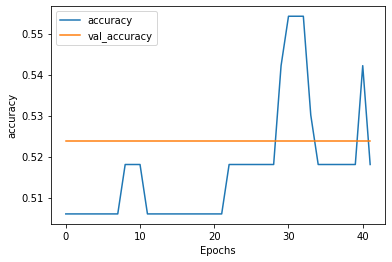

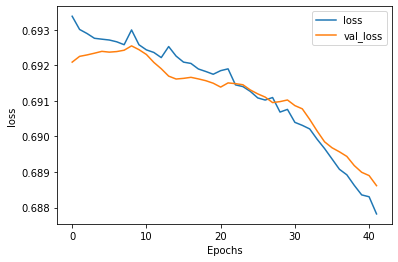

In [158]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [414]:
input_user = ["saya benci", "saya gembira"]
input_clean1 = list(map(round1,input_user))
input_clean1


['saya benci', 'saya gembira']

In [415]:
input_clean2 = list(map(round2,input_clean1))
input_clean2

['saya benci', 'saya gembira']

In [288]:
input_result = []
for item in input_clean2:
    input_result.append(remove_stopwords(item))


print('\n\n Filtered Sentence \n\n')
print(input_result) 



 Filtered Sentence 


['saya benci', 'saya gembira']


In [289]:
sentences = input_result
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.47801533]
 [0.47798958]]


In [290]:
#reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#def decode_sentence(text):
#    return ' '.join([reverse_word_index.get(i, '?') for i in text])

#print(decode_sentence(train_padded[0]))
#print(train_sentences[2])
#print(labels[2])

In [291]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 32)


In [292]:
#import io

#out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
#out_m = io.open('meta.tsv', 'w', encoding='utf-8')
#for word_num in range(1, vocab_size):
#  word = reverse_word_index[word_num]
#  embeddings = weights[word_num]
#  out_m.write(word + "\n")
#  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
#out_v.close()
#out_m.close()

In [293]:
#try:
#  from google.colab import files
#except ImportError:
#  pass
#else:
#  files.download('vecs.tsv')
# files.download('meta.tsv')